In [174]:
import time
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt

In [175]:
def show_imgs(imgs,l1=4,l2=5,s1=6,s2=6):
    """    Plot images    """
    plt.rcParams['figure.figsize']=(s1,s2)
    imgs=imgs.cpu().reshape([-1,28,28])
    g, ax = plt.subplots(l1,l2)
    for i in range(l1): 
        for j in range(l2):
            a=i*l2+j
            if(a>=imgs.shape[0]):
                break
            ax[i][j].imshow(imgs[a,:,:],cmap='summer')
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
    plt.show()
#show_imgs(data,2,10,10,2)

In [183]:
batch_size=10000
test_batch_size=100
epochs=1000
device=torch.device("cpu")
device=torch.device("cuda:0")
data_path='../../../data'
kwargs = {'num_workers': 1, 'pin_memory': True} if device != torch.device('cpu') else {}
train_loader = torch.utils.data.DataLoader( 
    datasets.MNIST(data_path, train=True,download=True, 
    transform=transforms.Compose([ transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) ])), batch_size=batch_size,
    shuffle=False, **kwargs)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(data_path, train=False,
    transform=transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.1307,),
    (0.3081,)) ])), batch_size=test_batch_size, shuffle=False, **kwargs)
train_data=[]
test_data=[]
for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    train_data.append((data,target))
for batch_idx, (data, target) in enumerate(test_loader):
    data, target = data.to(device), target.to(device)
    test_data.append((data,target))
#print(train_data[0])


        

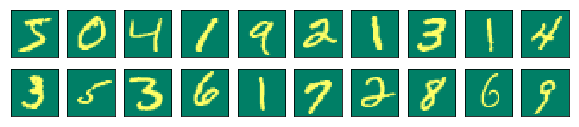

In [179]:
show_imgs(train_data[0][0],2,10,10,2)

In [184]:
nin=784
nout=10
W=torch.randn(nin,nout,device=device) 
W.requires_grad=True
bias = torch.randn(nout,device=device)
bias.requres_grad=True
print(train_data[0][0].shape)
lr=0.001
optimizer = torch.optim.Adam([W,bias], lr=lr, betas=(0.9, 0.999))
print_bin = epochs/100
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    t1=time.time()
    for batch_idx, (data, target) in enumerate(train_data):
#        loss = F.cross_entropy(data.view(data.shape[0],-1)@W+bias.expand(data.shape[0],nout),target)
        output=F.log_softmax(data.view(data.shape[0],-1)@W+bias.expand(data.shape[0],nout), dim=1)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
    test_loss = 0
    correct = 0
    for data, target in test_data:
        output=F.log_softmax(data.view(data.shape[0],-1)@W+bias.expand(data.shape[0],nout), dim=1)
        test_loss += F.nll_loss(output, target, reduction='sum').item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= 10000
    correct /= 10000
    if(epoch % print_bin==0):
        print("#%d loss=%.3f test_loss=%.3f accuracy=%.3f time=%.3f"%(epoch,loss,test_loss,correct,time.time()-t1))
        

torch.Size([10000, 1, 28, 28])
#10 loss=26.888 test_loss=27.740 accuracy=0.136 time=0.036
#20 loss=19.086 test_loss=19.920 accuracy=0.230 time=0.036
#30 loss=13.808 test_loss=14.583 accuracy=0.330 time=0.030
#40 loss=10.418 test_loss=11.069 accuracy=0.420 time=0.029
#50 loss=8.243 test_loss=8.756 accuracy=0.497 time=0.030
#60 loss=6.787 test_loss=7.193 accuracy=0.557 time=0.037
#70 loss=5.767 test_loss=6.108 accuracy=0.608 time=0.035
#80 loss=5.024 test_loss=5.324 accuracy=0.646 time=0.033
#90 loss=4.460 test_loss=4.735 accuracy=0.678 time=0.036
#100 loss=4.021 test_loss=4.278 accuracy=0.702 time=0.036
#110 loss=3.671 test_loss=3.917 accuracy=0.723 time=0.029
#120 loss=3.384 test_loss=3.624 accuracy=0.738 time=0.029
#130 loss=3.146 test_loss=3.379 accuracy=0.752 time=0.029
#140 loss=2.947 test_loss=3.172 accuracy=0.764 time=0.029
#150 loss=2.778 test_loss=2.995 accuracy=0.773 time=0.029
#160 loss=2.633 test_loss=2.842 accuracy=0.783 time=0.029
#170 loss=2.505 test_loss=2.708 accuracy=0